Checking files exist:
Purchase file: True User_product_purchase_details_p2.csv
User file:     True user_demographics.csv

Purchase data shape: (550068, 9)
User data shape:     (5891, 4)

Purchase columns: ['User_ID', 'Product_ID', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']
User columns:     ['User_ID', 'Gender', 'Age', 'Occupation']

Merged dataset shape: (550068, 12)

High value purchase distribution:
High_Value_Purchase
0    0.655426
1    0.344574
Name: proportion, dtype: float64
High_Value_Purchase
0    360529
1    189539
Name: count, dtype: int64

Dropping columns: ['Product_ID', 'User_ID', 'Purchase']
After drop shape: (550068, 10)

Null counts by column:
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Gender   

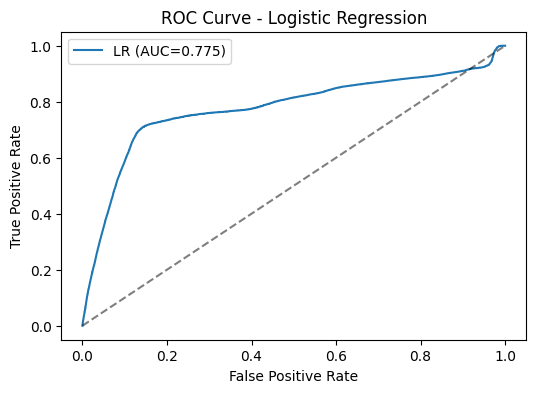

Top 15 features by absolute coefficient (Logistic Regression):
                          feature  abs_coef  coef_sign
0              Product_Category_1  0.761288  -0.761288
1                       Age_51-55  0.306565   0.306565
2                        Gender_M  0.288385   0.288385
3                 City_Category_C  0.254922   0.254922
4                       Age_36-45  0.232306   0.232306
5                       Age_46-50  0.208800   0.208800
6              Product_Category_2  0.202121  -0.202121
7                         Age_55+  0.200267   0.200267
8                       Age_26-35  0.186599   0.186599
9                       Age_18-25  0.115367   0.115367
10                City_Category_B  0.078832   0.078832
11             Product_Category_3  0.075300  -0.075300
12                     Occupation  0.025726   0.025726
13   Stay_In_Current_City_Years_1  0.020620   0.020620
14  Stay_In_Current_City_Years_4+  0.019127   0.019127

Training a simple RandomForest for feature importances (

c:\Users\User\Downloads\Paban_notes\.pyvenv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
12377/12377 - 9s - 758us/step - accuracy: 0.8514 - loss: 0.3647 - val_accuracy: 0.8853 - val_loss: 0.2883
Epoch 2/20
12377/12377 - 9s - 743us/step - accuracy: 0.8859 - loss: 0.2833 - val_accuracy: 0.8877 - val_loss: 0.2777
Epoch 3/20
12377/12377 - 9s - 760us/step - accuracy: 0.8900 - loss: 0.2720 - val_accuracy: 0.8960 - val_loss: 0.2658
Epoch 4/20
12377/12377 - 8s - 686us/step - accuracy: 0.8954 - loss: 0.2607 - val_accuracy: 0.8969 - val_loss: 0.2574
Epoch 5/20
12377/12377 - 10s - 785us/step - accuracy: 0.8969 - loss: 0.2573 - val_accuracy: 0.8976 - val_loss: 0.2548
Epoch 6/20
12377/12377 - 11s - 851us/step - accuracy: 0.8973 - loss: 0.2557 - val_accuracy: 0.8978 - val_loss: 0.2542
Epoch 7/20
12377/12377 - 10s - 770us/step - accuracy: 0.8977 - loss: 0.2542 - val_accuracy: 0.8984 - val_loss: 0.2559
Epoch 8/20
12377/12377 - 10s - 806us/step - accuracy: 0.8981 - loss: 0.2532 - val_accuracy: 0.8982 - val_loss: 0.2539
Epoch 9/20
12377/12377 - 9s - 743us/step - accuracy: 0.8982 

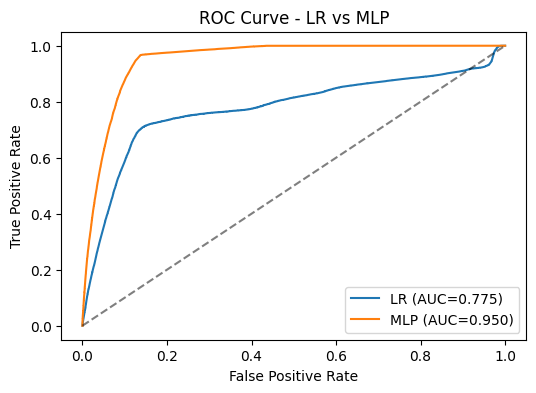

=== Final Comparison ===
Logistic Regression - Accuracy: 0.7350, ROC AUC: 0.7755
MLP (Neural Net)        - Accuracy: 0.8989, ROC AUC: 0.9499
RandomForest (for FI)   - Accuracy: 0.8914

Interpretation hints:
- If Logistic performs similarly to MLP, the problem may be linearly separable or dataset size / signal is small.
- If MLP outperforms LR, non-linear relationships were likely captured by hidden layers.
- Check class imbalance: we used 'class_weight' and stratify to mitigate imbalance impacts.

Top features according to Logistic Regression absolute coefficients (sign indicates direction):
                      feature  abs_coef  coef_sign
           Product_Category_1  0.761288  -0.761288
                    Age_51-55  0.306565   0.306565
                     Gender_M  0.288385   0.288385
              City_Category_C  0.254922   0.254922
                    Age_36-45  0.232306   0.232306
                    Age_46-50  0.208800   0.208800
           Product_Category_2  0.202121  -0.

In [3]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow.keras import models, layers, callbacks

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)


purchase_path = "User_product_purchase_details_p2.csv"
user_path = "user_demographics.csv"

print("Checking files exist:")
print("Purchase file:", os.path.exists(purchase_path), purchase_path)
print("User file:    ", os.path.exists(user_path), user_path)
print()

df_purchase = pd.read_csv(purchase_path)
df_user = pd.read_csv(user_path)

print("Purchase data shape:", df_purchase.shape)
print("User data shape:    ", df_user.shape)
print()

print("Purchase columns:", list(df_purchase.columns))
print("User columns:    ", list(df_user.columns))
print()


if 'User_ID' not in df_purchase.columns or 'User_ID' not in df_user.columns:
    raise ValueError("Expected 'User_ID' column in both files. Check column names.")

df = pd.merge(df_purchase, df_user, on='User_ID', how='left')
print("Merged dataset shape:", df.shape)
print()


if 'Purchase' not in df.columns:
    raise ValueError("'Purchase' column not found in merged dataset.")

df['High_Value_Purchase'] = (df['Purchase'] >= 10000).astype(int)
print("High value purchase distribution:")
print(df['High_Value_Purchase'].value_counts(normalize=True))
print(df['High_Value_Purchase'].value_counts())
print()


# Drop columns that are identifiers or not predictive. Keep Product_Category etc.
cols_to_drop = []
# Drop Product_ID because model should predict user-level propensity, not product id specifics
if 'Product_ID' in df.columns:
    cols_to_drop.append('Product_ID')
# Optionally drop User_ID for modeling
if 'User_ID' in df.columns:
    cols_to_drop.append('User_ID')
# Drop raw 'Purchase' since target derived from it (we don't use numeric purchase)
cols_to_drop.append('Purchase')

print("Dropping columns:", cols_to_drop)
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns], errors='ignore')
print("After drop shape:", df.shape)
print()


print("Null counts by column:")
print(df.isnull().sum())
print()

print("Data types:")
print(df.dtypes)
print()



# Identify numeric vs categorical heuristically
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Remove target from numeric features list if present
if 'High_Value_Purchase' in numeric_cols:
    numeric_cols.remove('High_Value_Purchase')

print("Numeric cols:", numeric_cols)
print("Categorical cols:", cat_cols)
print()

# Fill numeric NaNs with median
for col in numeric_cols:
    if df[col].isnull().any():
        med = df[col].median()
        df[col] = df[col].fillna(med)
        print(f"Filled numeric {col} NaNs with median={med}")

# Fill categorical NaNs with mode
for col in cat_cols:
    if df[col].isnull().any():
        mode = df[col].mode(dropna=True)
        if len(mode) > 0:
            mode = mode[0]
        else:
            mode = "Missing"
        df[col] = df[col].fillna(mode)
        print(f"Filled categorical {col} NaNs with mode='{mode}'")

print()
print("Null counts after imputation:")
print(df.isnull().sum())
print()


# Candidate categorical columns commonly in these datasets:
# Gender, Age, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_1/2/3
# We'll convert 'Stay_In_Current_City_Years' to string if it's numeric-coded categories.
if 'Stay_In_Current_City_Years' in df.columns:
    # some datasets have '4+' values; ensure treated as categorical
    df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(str)

# Identify final categorical columns again (after conversions)
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns to encode:", cat_cols)
print()

# Use one-hot encoding for nominal categorical variables; drop_first=True to avoid multicollinearity
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("Encoded dataframe shape:", df_encoded.shape)
print()


y = df_encoded['High_Value_Purchase']
X = df_encoded.drop(columns=['High_Value_Purchase'])

print("Feature shape:", X.shape, "Target shape:", y.shape)
print()


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=RANDOM_STATE, stratify=y
)
print("Train shape:", X_train.shape, y_train.shape)
print("Test  shape:", X_test.shape, y_test.shape)
print()


scaler = StandardScaler()
# Fit on train, transform both
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Determine which columns to scale: all columns that are numeric in X (after encoding)
cols_to_scale = X_train.select_dtypes(include=[np.number]).columns.tolist()
print("Columns to scale (count):", len(cols_to_scale))
# Fit scaler on training numeric columns only
scaler.fit(X_train[cols_to_scale])
X_train_scaled[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
print("Scaling complete.")
print()


print("Training Logistic Regression baseline...")
log_clf = LogisticRegression(random_state=RANDOM_STATE, max_iter=2000, solver='saga', class_weight='balanced')
log_clf.fit(X_train_scaled, y_train)
y_pred_lr = log_clf.predict(X_test_scaled)
y_pred_proba_lr = log_clf.predict_proba(X_test_scaled)[:, 1]

acc_lr = accuracy_score(y_test, y_pred_lr)
roc_lr = roc_auc_score(y_test, y_pred_proba_lr)
print(f"Logistic Regression Accuracy: {acc_lr:.4f}")
print(f"Logistic Regression ROC AUC:  {roc_lr:.4f}")
print()
print("Confusion Matrix (LR):")
print(confusion_matrix(y_test, y_pred_lr))
print()
print("Classification Report (LR):")
print(classification_report(y_test, y_pred_lr, digits=4))
print()

# Plot ROC curve for LR
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_lr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"LR (AUC={roc_lr:.3f})")
plt.plot([0,1],[0,1],'k--', alpha=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


# We will compute coefficient magnitude and show top positive/negative features
feat_names = X_train_scaled.columns
coefs = pd.Series(log_clf.coef_[0], index=feat_names)
coefs_sorted = coefs.abs().sort_values(ascending=False)

TOP_N = 15
print(f"Top {TOP_N} features by absolute coefficient (Logistic Regression):")
display_df = pd.DataFrame({
    'feature': coefs_sorted.index[:TOP_N],
    'abs_coef': coefs_sorted.values[:TOP_N],
    'coef_sign': [coefs[f] for f in coefs_sorted.index[:TOP_N]]
})
print(display_df)
print()


print("Training a simple RandomForest for feature importances (not the primary model)...")
rf = RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE, n_jobs=-1, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"RandomForest Accuracy (for importance): {acc_rf:.4f}")

imp = pd.Series(rf.feature_importances_, index=feat_names).sort_values(ascending=False)
print("Top 10 features by RandomForest importance:")
print(imp.head(10))
print()


# Build a straightforward MLP with 2 hidden layers
input_dim = X_train_scaled.shape[1]
print("Building MLP with input dim =", input_dim)

mlp = models.Sequential([
    layers.InputLayer(input_shape=(input_dim,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binary output
])

mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp.summary()

# Early stopping on val_loss
es = callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True, verbose=1)

# Train: convert y_train to numpy arrays
history = mlp.fit(
    X_train_scaled, y_train.values,
    validation_split=0.1,
    epochs=20,
    batch_size=32,
    callbacks=[es],
    verbose=2
)

# Evaluate on test set
loss_mlp, acc_mlp = mlp.evaluate(X_test_scaled, y_test.values, verbose=0)
y_pred_proba_mlp = mlp.predict(X_test_scaled).ravel()
y_pred_mlp = (y_pred_proba_mlp >= 0.5).astype(int)

print(f"MLP Test Loss: {loss_mlp:.4f}  Test Accuracy: {acc_mlp:.4f}")
print()
print("Confusion Matrix (MLP):")
print(confusion_matrix(y_test, y_pred_mlp))
print()
print("Classification Report (MLP):")
print(classification_report(y_test, y_pred_mlp, digits=4))
print()

# ROC AUC for MLP
roc_mlp = roc_auc_score(y_test, y_pred_proba_mlp)
print(f"MLP ROC AUC: {roc_mlp:.4f}")

# Plot ROC curve comparison
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_proba_mlp)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"LR (AUC={roc_lr:.3f})")
plt.plot(fpr_mlp, tpr_mlp, label=f"MLP (AUC={roc_mlp:.3f})")
plt.plot([0,1],[0,1],'k--', alpha=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LR vs MLP")
plt.legend()
plt.show()


print("=== Final Comparison ===")
print(f"Logistic Regression - Accuracy: {acc_lr:.4f}, ROC AUC: {roc_lr:.4f}")
print(f"MLP (Neural Net)        - Accuracy: {acc_mlp:.4f}, ROC AUC: {roc_mlp:.4f}")
print(f"RandomForest (for FI)   - Accuracy: {acc_rf:.4f}")
print()

print("Interpretation hints:")
print("- If Logistic performs similarly to MLP, the problem may be linearly separable or dataset size / signal is small.")
print("- If MLP outperforms LR, non-linear relationships were likely captured by hidden layers.")
print("- Check class imbalance: we used 'class_weight' and stratify to mitigate imbalance impacts.")
print()

print("Top features according to Logistic Regression absolute coefficients (sign indicates direction):")
print(display_df.to_string(index=False))
print()

print("Top features by RandomForest importance (top 10):")
print(imp.head(10).to_string())
print()



print("Pipeline finished. Models and artifacts can be saved if needed.")
